<a href="https://colab.research.google.com/github/misiek98/Parkings-Spots-Detector/blob/master/detect_parking_lines/trainingv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

In [ ]:
os.mkdir('pos')
os.mkdir('neg')
os.mkdir('xml_data')

In [ ]:
img = cv2.imread('/content/file.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/pos/file.bmp', img)

In [ ]:
for negImage in os.listdir('/content/neg'):
  img = cv2.imread(os.path.join('/content/neg', negImage))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (275, 125))
  cv2.imwrite(os.path.join('/content/neg', negImage), img)

In [ ]:
with open('neg.txt', 'a') as file:
  for negImage in os.listdir('/content/neg'):
    file.write(os.path.join('/content/neg', negImage))
    file.write('\n')

In [ ]:
%%bash

opencv_createsamples -info ps.info -num 42 -w 98 -h 28 -vec cars.vec

Info file name: ps.info
Img file name: (NULL)
Vec file name: cars.vec
BG  file name: (NULL)
Num: 42
BG color: 0
BG threshold: 80
Invert: FALSE
Max intensity deviation: 40
Max x angle: 1.1
Max y angle: 1.1
Max z angle: 0.5
Show samples: FALSE
Width: 98
Height: 28
Max Scale: -1
Create training samples from images collection...
Done. Created 42 samples


In [ ]:
%%bash

opencv_traincascade -data xml_data -vec cars.vec -bg neg.txt -numPos 42 -numNeg 161 -numStages 20 -w 98 -h 28 -featureType LBP

PARAMETERS:
cascadeDirName: xml_data
vecFileName: cars.vec
bgFileName: neg.txt
numPos: 42
numNeg: 161
numStages: 20
precalcValBufSize[Mb] : 1024
precalcIdxBufSize[Mb] : 1024
acceptanceRatioBreakValue : -1
stageType: BOOST
featureType: LBP
sampleWidth: 98
sampleHeight: 28
boostType: GAB
minHitRate: 0.995
maxFalseAlarmRate: 0.5
weightTrimRate: 0.95
maxDepth: 1
maxWeakCount: 100
Number of unique features given windowSize [98,28] : 199584

===== TRAINING 0-stage =====
<BEGIN
POS count : consumed   42 : 42
NEG count : acceptanceRatio    161 : 1
Precalculation time: 2
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|        1|        0|
+----+---------+---------+
END>
Training until now has taken 0 days 0 hours 0 minutes 4 seconds.

===== TRAINING 1-stage =====
<BEGIN
POS count : consumed   42 : 42
NEG count : acceptanceRatio    161 : 0.192354
Precalculation time: 1
+----+---------+---------+
|  N |    HR   |    FA   |
+----+---------+---------+
|   1|  

Total 38 face(s) found on the image


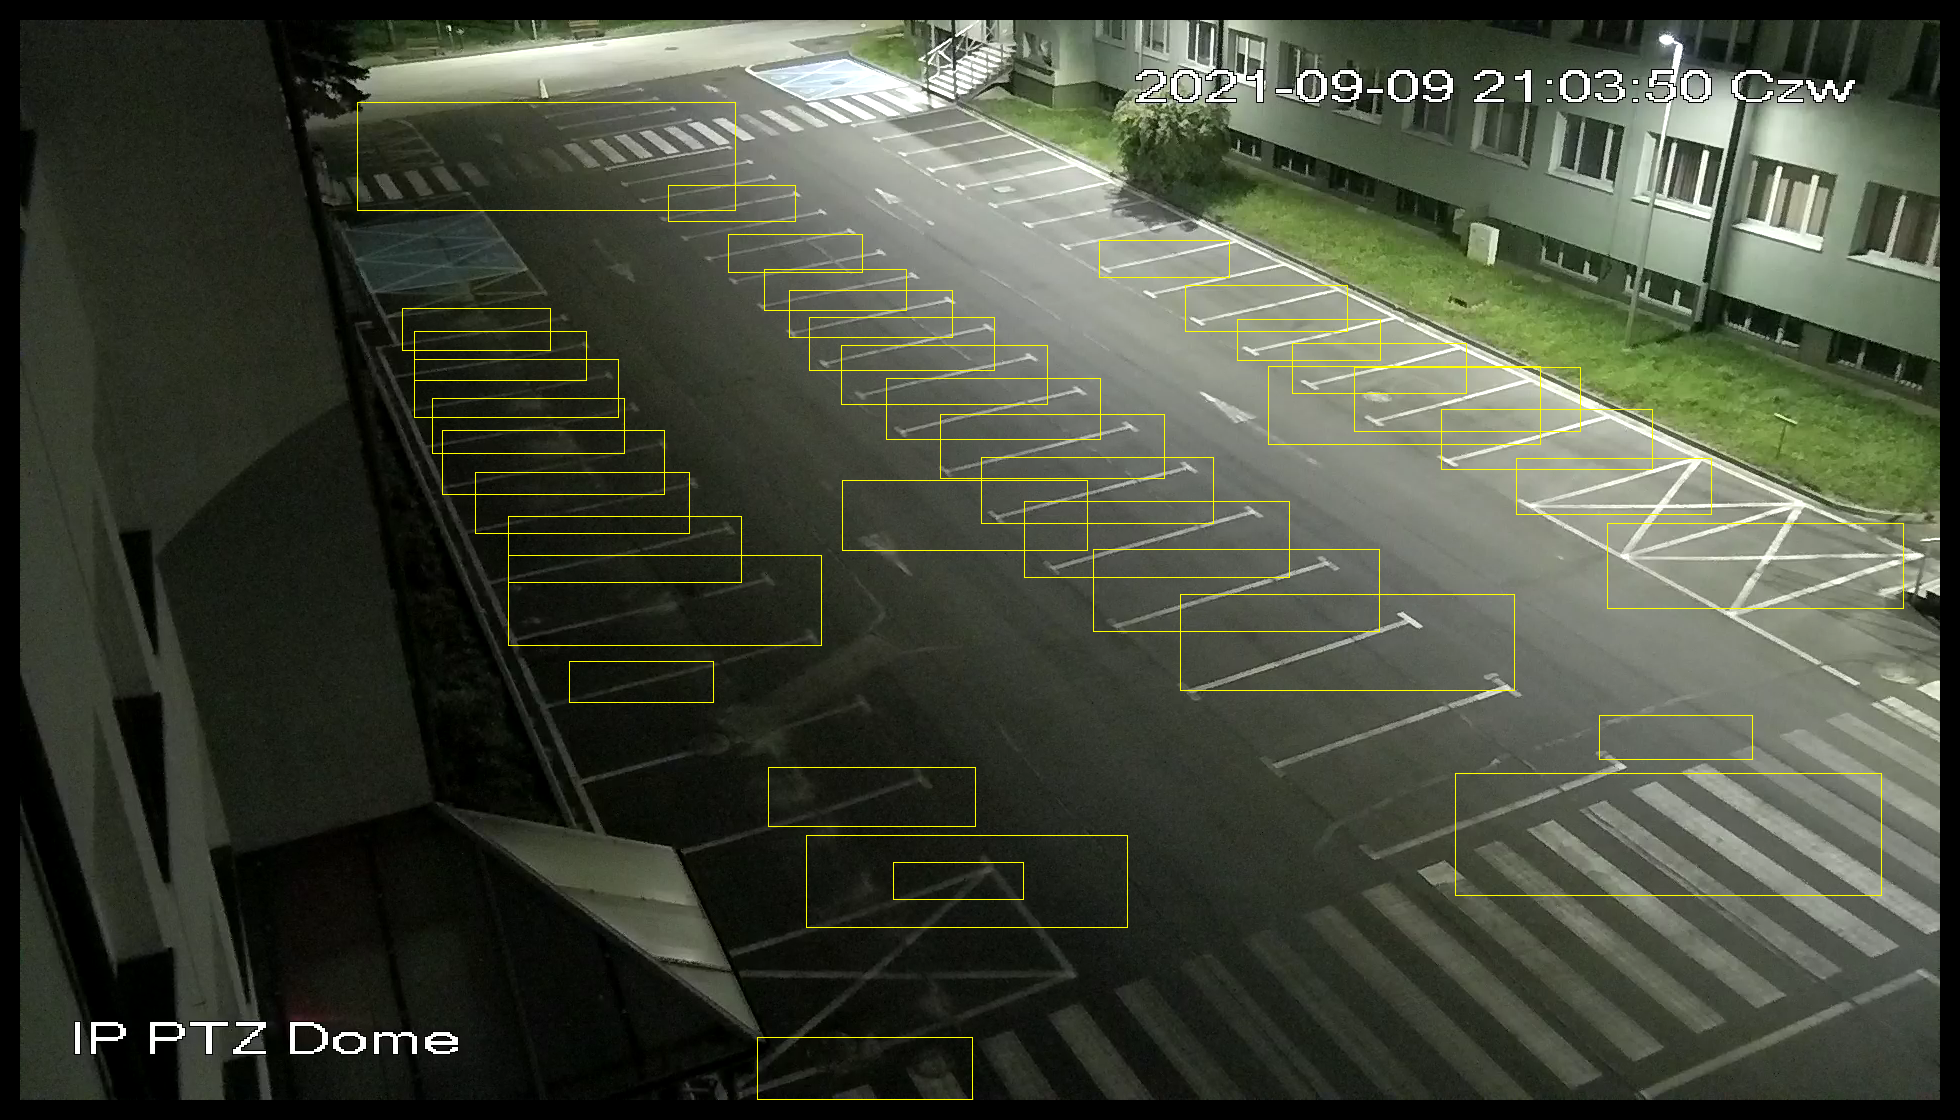

In [ ]:
# load the image and convert it to grayscale
image = cv2.imread('/content/file.bmp')
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the line detector and detect lines in the image
lineDetector = cv2.CascadeClassifier('/content/xml_data/cascade.xml') # link do xml'a

# Use the below code, if you are using OpenCv 3.0+
lineRegions = lineDetector.detectMultiScale(grayImage, scaleFactor=1.09, minNeighbors=6, minSize=(32, 32), flags=cv2.CASCADE_SCALE_IMAGE)

print(f"Total {len(lineRegions)} line(s) found on the image")

# Now we loop over the lines and draw a rectangle 
# around each of the image line which we found.
for (x, y, w, h) in lineRegions:
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 1)

# show the detected lines on screen
cv2_imshow(image)